In [1]:
import pandas as pd
import numpy as np

from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso

from mlxtend.evaluate import bias_variance_decomp


# Q1 - Bias-Variance Tradeoff

## Q1.1

In [61]:
auto = load_data('Auto')
y    = auto['mpg']
X    = auto.drop(['mpg','name'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=156)


## Q1.2

In [190]:
poly         = PolynomialFeatures (degree=i, include_bias=False)

X_train_poly = ... # you can check tutorials for the correct syntax
X_test_poly  = ...

model = LinearRegression()
mse, bias,var = bias_variance_decomp(model,
                                     X_train_poly, y_train.to_numpy(), X_test_poly, y_test.to_numpy(), 
                                     loss='mse', num_rounds=200, random_seed=156)


In [ ]:
MSEs   = []
Biases = []
Vars   = []

# Fit model and collect performance iteratively
for i in range(1,13):
    # Fit a Polynomial Regression model
    ...
    
    model = ...
    mse, bias,var = ...

    # Calculate performance
    MSEs ...
    Biases ...
    Vars ...
    print('MSE: %s, Bias: %s, Var: %s ' %(mse.round(2),bias.round(2),var.round(2)))


In [193]:
# Make the results a data frame

...


In [ ]:
# Plot
res.plot()


## Q1.3

In [ ]:
MSEs   = []
Biases = []
Vars   = []
# Fit model and collect performance iteratively
for i in range(1,13):
    ...


In [196]:
...


In [ ]:
...


# Q2

## Q2.1

In [ ]:

model      = LinearRegression()
cv_results = ...
mse_avg    = ...
print('MSE (5-Fold CV): ', mse_avg)


## Q2.2

In [ ]:
MSEs = []
# Fit model and collect performance iteratively
for a in np.arange(0,1,.01):
    # Fit a Lasso Regression model
    model = ...
    cv_results = ...

    # Calculate performance
    mse_avg = ...
    MSEs.append(...)


In [ ]:
MSEs = pd.DataFrame(MSEs)

MSEs.plot()


In [ ]:
print(MSEs.min())


# Q3

## Q3.1

In [240]:
np.random.seed(156)


In [241]:
all_inds   = np.arange(392)
train_inds = ...
train_uniq = ...
test_uniq  = ...


In [ ]:
print(len(train_uniq),len(test_uniq))


## Q3.2

In [243]:
np.random.seed(156)
seeds = np.random.randint(0,10000,1000)

train_lens = []
test_lens  = []
all_inds   = np.arange(392)
for i in range(1000):
    np.random.seed(seeds[i])
    train_inds = ...
    train_uniq = ...
    test_uniq  = ...
    train_lens.append(len(train_uniq))
    test_lens.append(len(test_uniq))


In [ ]:
# Probability of jth item being in the train set
...


In [ ]:
# Probability of jth item being in the test set
...


# Q4

In [253]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [254]:
np.random.seed(156)
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=32)

# Mapping the numerical labels to colors
color_map = {0: 'orange', 1: 'green', 2: 'blue'}
colors = [color_map[label] for label in y]

# Creating a DataFrame
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['color'] = colors

# Now df is your dataset with 'feature1', 'feature2', and 'color'


In [255]:
# Setting random seed for reproducibility

def generate_clusters_color_them():
    # Generating synthetic data with 3 clusters
    X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=32)

    # Mapping the numerical labels to colors
    color_map = {0: 'orange', 1: 'green', 2: 'blue'}
    colors = [color_map[label] for label in y]

    # Creating a DataFrame
    df = pd.DataFrame(X, columns=['feature1', 'feature2'])
    df['color'] = colors

    # Visualizing the data
    plt.scatter(df['feature1'], df['feature2'], c=df['color'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Dataset with Three Clusters')
    plt.show()


In [256]:
# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


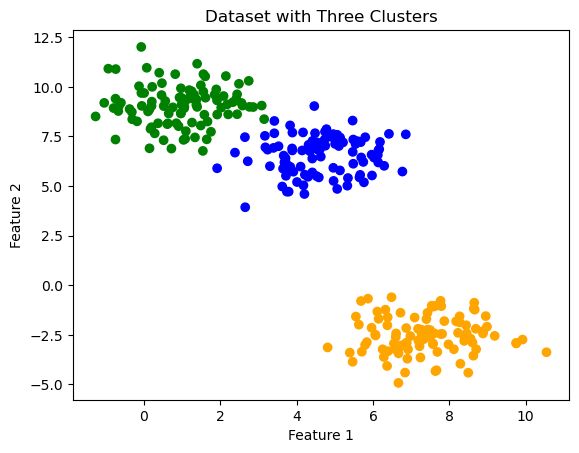

In [257]:
# The input data and the 3 clusters
generate_clusters_color_them()


### Data Analysis and Preparation:

- Prepare the dataset for binary classification tasks: blue vs not blue, green vs not green and orange vs not orange. 
   - Add 3 columns to your dataset, `is_green`, `is_blue`, `is_orange`
   - You can use ordinal mapping; map to 1 if it is the given colour and 0 if not.

In [ ]:
df['is_orange'] = ...
df['is_blue']   = ...
df['is_green']  = ...


In [ ]:
# Train Log Reg for Orange
# Splitting the data for 'orange' classification
X_train_orange, X_test_orange, y_train_orange, y_test_orange = ...

# Train Logistic Regression for 'orange' classification
orange_classifier = ...
...

# Model Accuracy
preds = ...
print('Orange Classifier Accuracy: ', accuracy_score(preds,y_test_orange))


In [ ]:
# Plotting decision boundaries for 'orange' classifier
plot_decision_boundary(X_test_orange.values, y_test_orange.values, 
                       orange_classifier, "Decision Boundary for 'Orange' Classifier",)


In [258]:
# Train Log Reg for Green


In [ ]:
# Plotting decision boundaries for 'green' classifier


In [ ]:
# Train Log Reg for Blue


In [ ]:
# Plotting decision boundaries for 'blue' classifier


### Reflection and Analysis:
- Discuss the model's behaviour when classifying `blue` points and compare with other models for other colours.
- Discuss any patterns of misclassification and possible reasons for these.

...